# Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import os
from google.colab import drive
from google.colab.patches import cv2_imshow

from skimage.feature import hog
from skimage import exposure

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Creating images list and labels list using google drive

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Directory path in your Google Drive where the images are stored
directory = '/content/drive/MyDrive/Computer_Vision_Project'

# List to store the images
images = []
labels =[]
images_path = []
# Iterate through all the files in the directory
for filename in os.listdir(directory):
    # Check the file extension (adjust accordingly)
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(directory, filename)
        images_path.append(image_path)
        print(image_path)
        start_index = image_path.index("test_") + 7
        end_index = image_path.index(".jpg")
        expression = image_path[start_index:end_index]
        labels.append(expression)
        image = cv2.imread(image_path)
        
        # Add the image to the list
        images.append(image)

# Print the number of loaded images
print("Number of loaded images:", len(images))
print(labels)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Computer_Vision_Project/test_5_1.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_4_1.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_2_1.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_1_1.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_1_2.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_2_2.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_3_2.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_4_2.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_5_2.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_6_2.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_1_3.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_2_3.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_3_3.jpg
/content/drive/MyDrive/Computer_Vision_Project/test_4_3.jpg
/content/drive/MyDrive/Computer

# Extract Histograms

In [ ]:
# Fonction pour extraire l'histogramme d'une image en couleur
def extract_color_histogram(image):
    # Séparation des canaux de couleur
    b, g, r = cv2.split(image)
    
    # Calcul des histogrammes pour chaque canal de couleur
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    
    # Normalisation des histogrammes
    hist_r /= hist_r.sum()
    hist_g /= hist_g.sum()
    hist_b /= hist_b.sum()
    
    histogram = np.concatenate((hist_r, hist_g, hist_b)).flatten()
    return histogram


In [ ]:
# Fonction pour extraire l'histogramme d'une image en couleur
def extract_color_histogram_test(image):
    # Séparation des canaux de couleur
    b, g, r = cv2.split(image)
    
    # Calcul des histogrammes pour chaque canal de couleur
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
    
    # Normalisation des histogrammes
    hist_r /= hist_r.sum()
    hist_g /= hist_g.sum()
    hist_b /= hist_b.sum()
    
    return hist_r, hist_g, hist_b


# Training KNN Using only COLOR Histograms

In [ ]:
histograms = []
for image in images:
    histogram = extract_color_histogram(image)
    histograms.append(histogram)
histograms = np.array(histograms)

labels = np.array(labels)

# Split the dataset into training and testing subsets
train_data, test_data, train_labels, test_labels = train_test_split(
    histograms, labels, test_size=0.2, random_state=42
)

# Création du classificateur KNN
k = 3 # Nombre de voisins à considérer
knn = KNeighborsClassifier(n_neighbors=k)

# Entraînement du modèle KNN sur les données d'entraînement
knn.fit(train_data, train_labels)

# Prédiction des étiquettes pour les données de test
predicted_labels = knn.predict(test_data)

# Calcul du score
score = knn.score(test_data, test_labels)

print("Predicted labels:", predicted_labels)
print("True labels:", test_labels)
print("Score:", score)


Predicted labels: ['1' '1' '1' '10' '1' '10' '1' '1' '2' '5' '2' '6']
True labels: ['1' '2' '6' '3' '9' '11a' '11a' '5' '9' '3' '9' '1']
Score: 0.08333333333333333


# Plotting Histograms of Colors

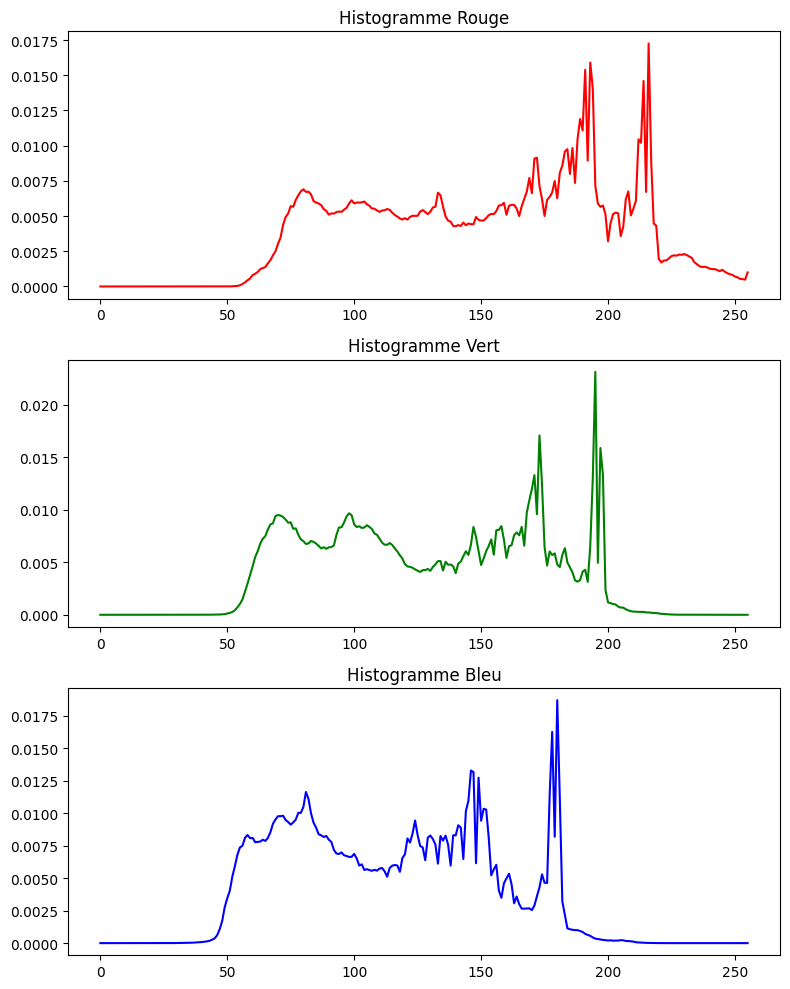

In [ ]:
# Exemple d'utilisation
image_path = 'test.jpg'
image = cv2.imread(image_path)

histogram_r, histogram_g, histogram_b = extract_color_histogram_test(image)

# Création de sous-figures pour chaque histogramme
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Tracé de l'histogramme du canal rouge
axs[0].plot(histogram_r, color='red')
axs[0].set_title('Histogramme Rouge')

# Tracé de l'histogramme du canal vert
axs[1].plot(histogram_g, color='green')
axs[1].set_title('Histogramme Vert')

# Tracé de l'histogramme du canal bleu
axs[2].plot(histogram_b, color='blue')
axs[2].set_title('Histogramme Bleu')

# Ajustement des espacements entre les sous-figures
plt.tight_layout()

# Affichage des sous-figures
plt.show()


In [ ]:
histograms = []
for image in images:
    histogram = extract_color_histogram(image)
    histograms.append(histogram)
histograms = np.array(histograms)

# Création du classificateur KNN
k = 3 # Nombre de voisins à considérer
knn = KNeighborsClassifier(n_neighbors=k)

# Entraînement du modèle KNN
knn.fit(histograms, labels)

# Exemple d'une nouvelle image pour laquelle nous voulons prédire l'étiquette
new_image_path = 'test.jpg'
new_image = cv2.imread(new_image_path)

# Extraction des histogrammes pour la nouvelle image
new_histogram = extract_color_histogram(new_image)

# Prédiction de l'étiquette pour la nouvelle image
predicted_label = knn.predict([new_histogram])
predicted_label_str = str(predicted_label[0])
if predicted_label_str.endswith("1"):
    print('Aymen')
if predicted_label_str.endswith("2"):
    print('Wassim')
if predicted_label_str.endswith("3"):
    print('Asma')
if predicted_label_str.endswith("4"):
    print('Rahma')
if predicted_label_str.endswith("5"):
    print('Sadok')
if predicted_label_str.endswith("6"):
    print('Seif')
if predicted_label_str.endswith("7"):
    print('Sirine')
if predicted_label_str.endswith("8"):
    print('Firas')
if predicted_label_str.endswith("9"):
    print('Anas')
if predicted_label_str.endswith("10"):
    print('Amani')
if predicted_label_str.endswith("11a"):
    print('Adam')
if predicted_label_str.endswith("12r"):
    print('Rania')

Aymen


# Pre-processing using Gaussian Filter

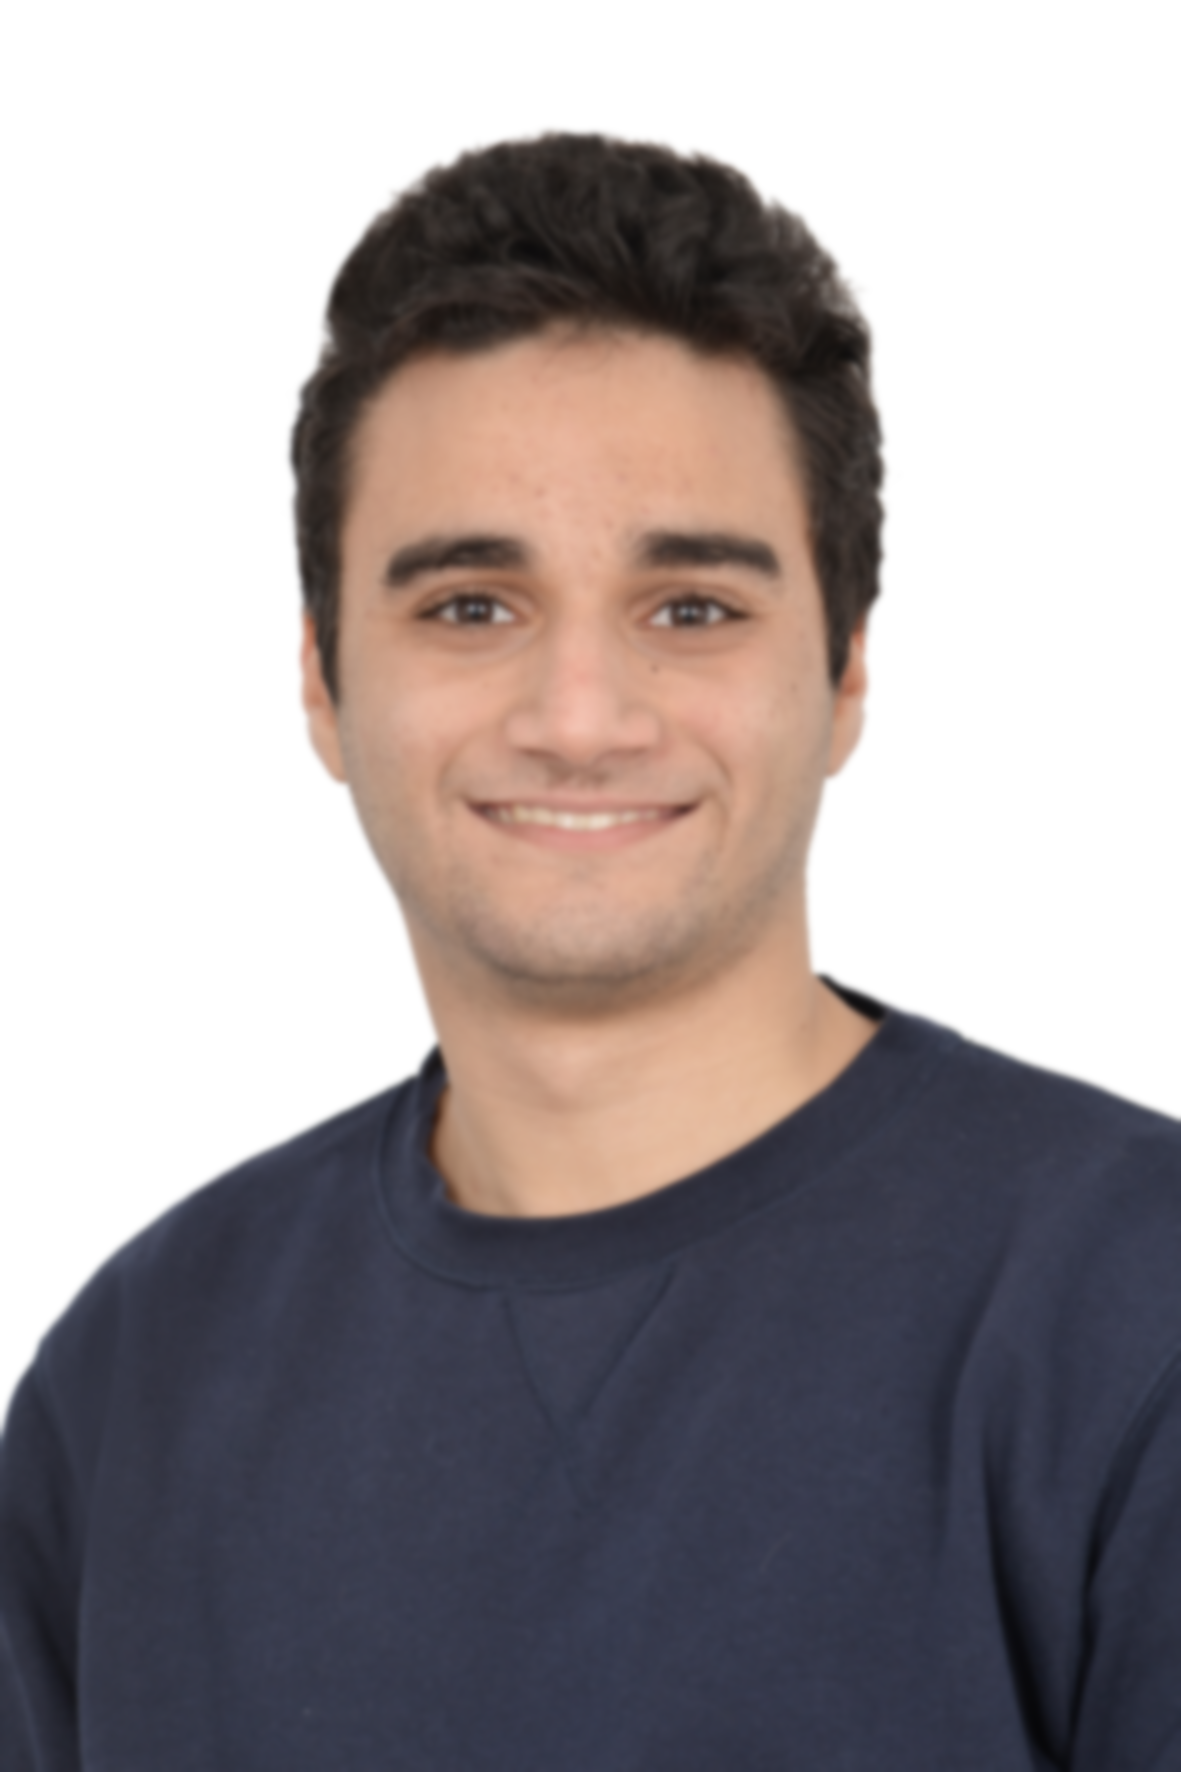

In [ ]:
def apply_gaussian_filter(image_path, sigma):
    # Load the image
    image = cv2.imread(image_path)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)

    return blurred

# Example usage
sigma = 3  # Adjust the sigma value for the desired amount of blurring

blurred_images = []  # List to store the blurred images

for image_path in images_path:
    blurred_image = apply_gaussian_filter(image_path, sigma)
    blurred_images.append(blurred_image)


cv2_imshow(blurred_images[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

# Extracting Faces from images


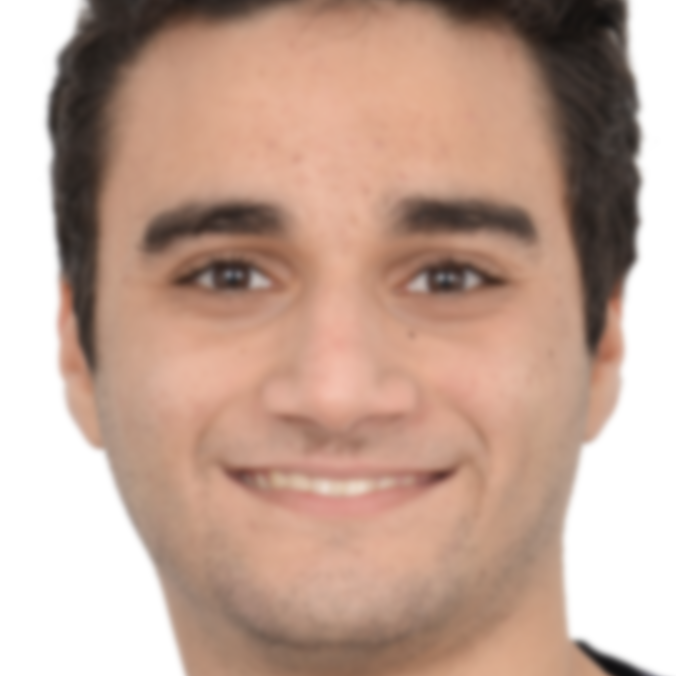

In [ ]:
# Load the Haar cascade XML file for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


# List to store the extracted face regions
face_regions = []
labels2= []
# Iterate over the image paths
for image, label in zip(blurred_images, labels):
    # Load the input image

    # Convert the image to grayscale for face detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Iterate over the detected faces
    for (x, y, w, h) in faces:
        # Extract the face region of interest (ROI)
        face_roi = image[y:y+h, x:x+w]
        
        # Append the extracted face region to the list
        face_regions.append(face_roi)
        labels2.append(label)

# Example usage: Display the first extracted face region
if face_regions:
    cv2_imshow(face_regions[0])
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [ ]:
print(labels2)

['1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '1', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '9', '10', '10', '10', '10', '10', '10', '10', '11a', '12r', '11a', '11a', '11a', '1']


# Eye preprocessing

In [ ]:
# Load the pre-trained Haar cascade for eye detection
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

# Create a list to store the eye regions
eyes = []
labels3 = []

# Iterate over the input images
for image, label in zip(face_regions, labels2):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect eyes in the image
    eye_regions = eye_cascade.detectMultiScale(gray)
    
    # Select the eye with the best horizontal symmetry
    if len(eye_regions) > 0:
        best_symmetry_score = -1  # Initialize the best symmetry score
        best_eye = None  # Initialize the best eye region
        
        for (x, y, w, h) in eye_regions:
            eye_roi = gray[y:y+h, x:x+w]
            flipped_roi = cv2.flip(eye_roi, 1)  # Flip the eye region horizontally
            
            # Calculate the symmetry score based on pixel-wise absolute difference
            symmetry_score = np.mean(np.abs(eye_roi - flipped_roi))
            
            # Update the best eye region if the symmetry score is higher
            if symmetry_score > best_symmetry_score:
                best_symmetry_score = symmetry_score
                best_eye = (x, y, w, h)
        
        # Extract the best eye region
        (x, y, w, h) = best_eye
        eye_roi = gray[y:y+h, x:x+w]
        eyes.append(eye_roi)
        labels3.append(label)

# Perform further processing with the eye features as needed


In [ ]:
len(labels3)

64

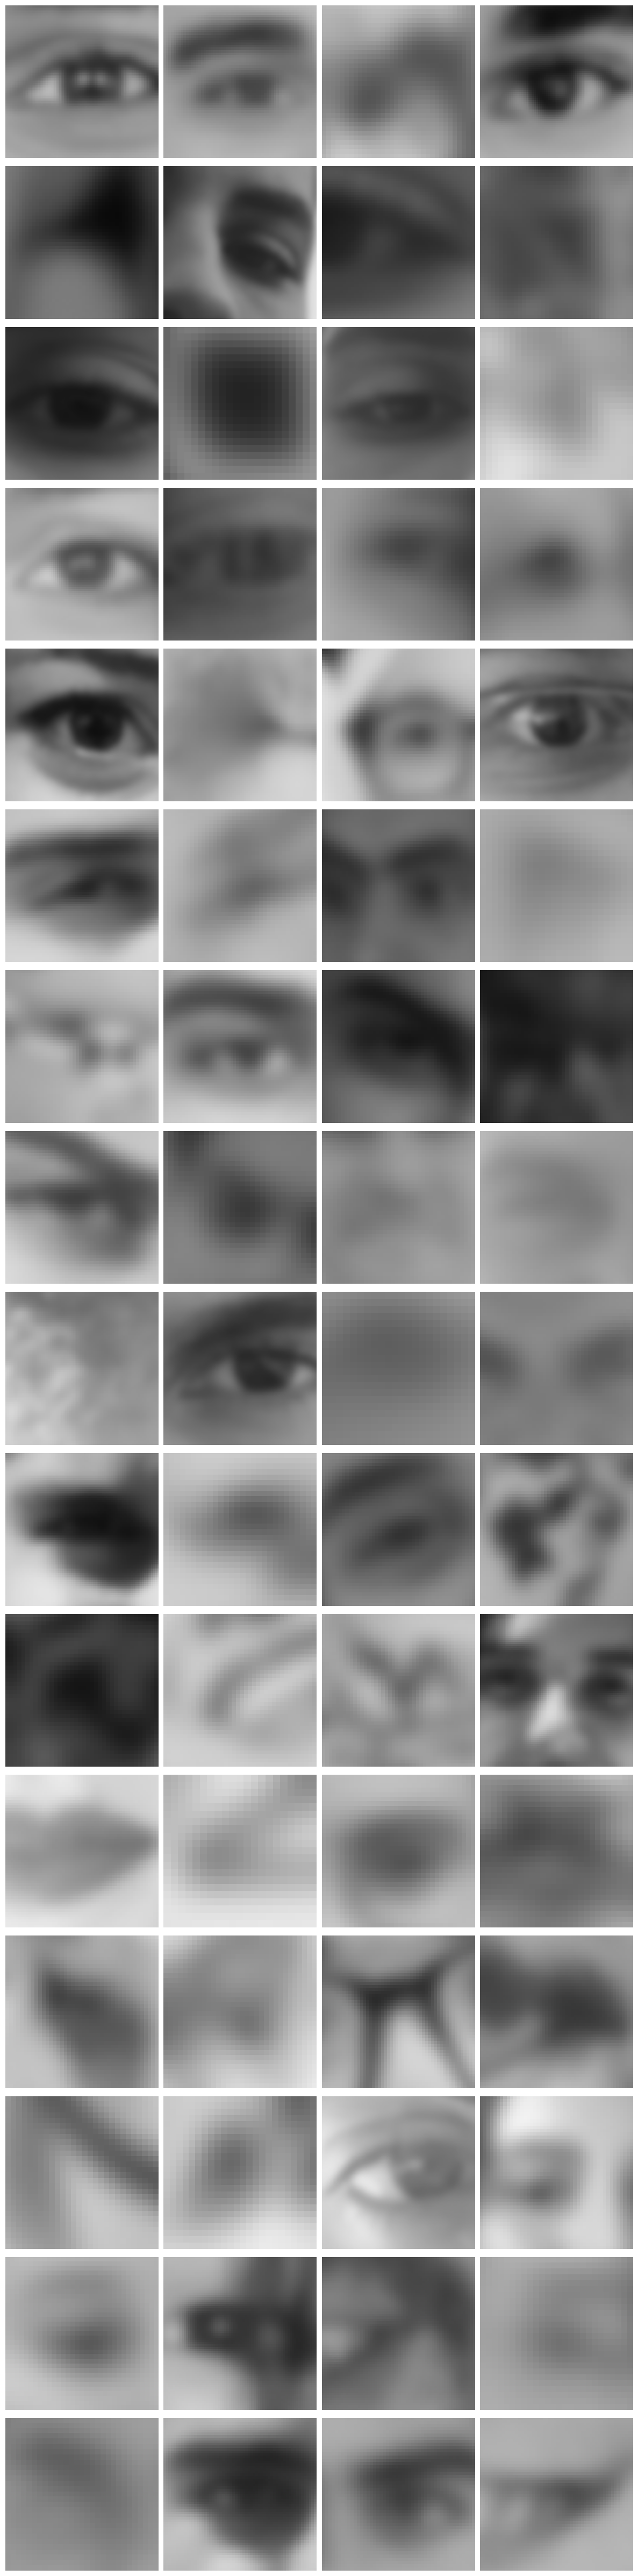

In [ ]:
if eyes:
    num_images = len(eyes)
    rows = (num_images + 3) // 4  # Calcul du nombre de lignes nécessaires
    cols = 4  # 4 images par ligne

    # Configurer la disposition des sous-plots
    fig, axs = plt.subplots(rows, cols, figsize=(12, 3*rows))

    # Afficher chaque groupe de 4 images dans les sous-plots correspondants
    for i, image in enumerate(eyes):
        row = i // cols
        col = i % cols
        ax = axs[row, col]
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.axis("off")

    # Gérer le cas où le dernier groupe n'est pas complet
    for i in range(num_images, rows * cols):
        row = i // cols
        col = i % cols
        fig.delaxes(axs[row, col])

    plt.tight_layout()
    plt.show()





In [ ]:
len(eyes)

64

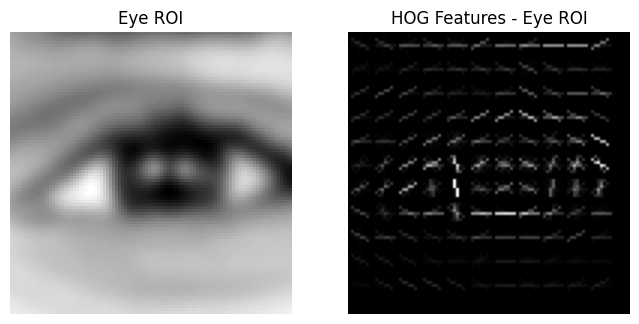

In [ ]:
# Parameters for HOG feature extraction
num_bins = 9  # Number of histogram bins
cell_size = (8, 8)  # Cell size
block_size = (2, 2)  # Block size
block_stride = (1, 1)  # Block stride

# Function to extract HOG features from an image
def extract_hog_features(image):
    features, hog_image = hog(image, orientations=num_bins, pixels_per_cell=cell_size,
                              cells_per_block=block_size, block_norm='L2', visualize=True)
    return features, hog_image

# Lists to store the HOG features for each image
eye_hog_features_list = []

# Iterate over the face regions
for n, eye_roi in enumerate(eyes):

    
    # Check if the regions of interest are valid
    if eye_roi.shape[0] > 0 and eye_roi.shape[1] > 0 :
        # Extract HOG features from eye ROI
        eye_hog_features, eye_hog_image = extract_hog_features(eye_roi)
        
        
        # Append the HOG features to the lists
        eye_hog_features_list.append(eye_hog_features)
        
        if n == 0:
            # Plot the HOG features for eye ROI
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
            ax1.imshow(eye_roi, cmap='gray')
            ax1.axis('off')
            ax1.set_title('Eye ROI')
            ax2.imshow(eye_hog_image, cmap='gray')
            ax2.axis('off')
            ax2.set_title('HOG Features - Eye ROI')
            plt.show()
            


In [ ]:
np.array(eye_hog_features_list).shape

<ipython-input-24-9887278ccb85>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(eye_hog_features_list).shape


(64,)

# Training using KNN and Decision Tree

In [ ]:
# Convert the feature lists to NumPy arrays
eye_features = np.array(eye_hog_features_list)
labels3 = np.array(labels3)

# Extract statistical features from the HOG features
eye_features_stats = []
for hog_feature in eye_features:
    feature_stats = [
        np.mean(hog_feature),
        np.std(hog_feature),
        np.min(hog_feature),
        np.max(hog_feature)
    ]
    eye_features_stats.append(feature_stats)

eye_features_stats = np.array(eye_features_stats)

# Split the dataset into training and testing subsets
train_data, test_data, train_labels, test_labels = train_test_split(
    eye_features_stats, labels3, test_size=0.2, random_state=42
)

# Create the KNN classifier
k = 5  # Number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model on the training data
knn.fit(train_data, train_labels)

# Predict labels for the test data
predicted_labels = knn.predict(test_data)

# Calculate the accuracy score
score = knn.score(test_data, test_labels)

print("Predicted labels:", predicted_labels)
print("True labels:", test_labels)
print("Score:", score)


Predicted labels: ['3' '6' '1' '1' '1' '1' '1' '1' '7' '11a' '5' '5' '7']
True labels: ['9' '11a' '1' '7' '2' '6' '3' '3' '5' '11a' '10' '2' '7']
Score: 0.23076923076923078


<ipython-input-25-e82c11a32793>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  eye_features = np.array(eye_hog_features_list)


In [ ]:
# Convert the feature lists to NumPy arrays
eye_features = np.array(eye_hog_features_list)
labels3 = np.array(labels3)

# Extract statistical features from the HOG features
eye_features_stats = []
for hog_feature in eye_features:
    feature_stats = [
        np.mean(hog_feature),
        np.std(hog_feature),
        np.min(hog_feature),
        np.max(hog_feature)
    ]
    eye_features_stats.append(feature_stats)

eye_features_stats = np.array(eye_features_stats)

# Split the dataset into training and testing subsets
train_data, test_data, train_labels, test_labels = train_test_split(
    eye_features_stats, labels3, test_size=0.2, random_state=42
)

# Create the decision tree classifier

decision_tree = DecisionTreeClassifier()

# Train the decision tree model on the training data
decision_tree.fit(train_data, train_labels)

# Predict labels for the test data
predicted_labels = decision_tree.predict(test_data)

# Calculate the accuracy score
score = decision_tree.score(test_data, test_labels)

print("Predicted labels:", predicted_labels)
print("True labels:", test_labels)
print("Score:", score)


Predicted labels: ['2' '5' '11a' '2' '2' '2' '2' '11a' '3' '11a' '5' '5' '7']
True labels: ['9' '11a' '1' '7' '2' '6' '3' '3' '5' '11a' '10' '2' '7']
Score: 0.23076923076923078


<ipython-input-26-ea4225393060>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  eye_features = np.array(eye_hog_features_list)


# Using Face recognition API (Deep Learning)

In [ ]:
!pip3 install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=40c92a6fa1d85b38c984202193afce77bcb0312efcc5a011eb901272233da5be
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import matplotlib.image as mpimg
import face_recognition
from PIL import Image, ImageDraw

In [ ]:
def recognize_faces(url1, url2, url3, url4, url5, url6, url7, url8, url9, url10, url11, url12):
    # This function recognizes faces in the given images and returns the names of the recognized persons.
    
    # Load a sample picture and learn how to recognize it.
    aymen_image = face_recognition.load_image_file(url1)
    aymen_face_encoding = face_recognition.face_encodings(aymen_image)[0]

    # Load a second sample picture and learn how to recognize it.
    wassim_image = face_recognition.load_image_file(url2)
    wassim_face_encoding = face_recognition.face_encodings(wassim_image)[0]

    # Load a sample picture and learn how to recognize it.
    asma_image = face_recognition.load_image_file(url3)
    asma_face_encoding = face_recognition.face_encodings(asma_image)[0]

    # Load a second sample picture and learn how to recognize it.
    amani_image = face_recognition.load_image_file(url4)
    amani_face_encoding = face_recognition.face_encodings(amani_image)[0]

    # Load a sample picture and learn how to recognize it.
    anas_image = face_recognition.load_image_file(url5)
    anas_face_encoding = face_recognition.face_encodings(anas_image)[0]

    # Load a second sample picture and learn how to recognize it.
    adam_image = face_recognition.load_image_file(url6)
    adam_face_encoding = face_recognition.face_encodings(adam_image)[0]

    # Load a sample picture and learn how to recognize it.
    firas_image = face_recognition.load_image_file(url7)
    firas_face_encoding = face_recognition.face_encodings(firas_image)[0]

    # Load a second sample picture and learn how to recognize it.
    rahma_image = face_recognition.load_image_file(url8)
    rahma_face_encoding = face_recognition.face_encodings(rahma_image)[0]

    # Load a sample picture and learn how to recognize it.
    rania_image = face_recognition.load_image_file(url9)
    rania_face_encoding = face_recognition.face_encodings(rania_image)[0]

    # Load a second sample picture and learn how to recognize it.
    sirine_image = face_recognition.load_image_file(url10)
    sirine_face_encoding = face_recognition.face_encodings(sirine_image)[0]
    # Load a sample picture and learn how to recognize it.
    sadok_image = face_recognition.load_image_file(url11)
    sadok_face_encoding = face_recognition.face_encodings(sadok_image)[0]


    # Create arrays of known face encodings and their names
    known_face_encodings = [
        aymen_face_encoding,
        wassim_face_encoding,
        asma_face_encoding,
        amani_face_encoding,
        anas_face_encoding,
        adam_face_encoding,
        firas_face_encoding,
        rahma_face_encoding,
        rania_face_encoding,
        sirine_face_encoding,
        sadok_face_encoding
    ]
    known_face_names = [
        "Aymen",
        "Wassim",
        "Asma",
        "Amani",
        "Anas",
        "Adam",
        "Firas",
        "Rahma",
        "Rania",
        "Sirine",
        "Sadok"
    ]

    # Load an image with an unknown face
    unknown_image = face_recognition.load_image_file(url12)

    # Find all the faces and face encodings in the unknown image
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    recognized_names = []

    # Loop through each face found in the unknown image
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name = "Unknown"

        # If a match was found in known_face_encodings, just use the first one.
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]

        recognized_names.append(name)

    return recognized_names


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Directory path in your Google Drive where the images are stored
directory = '/content/drive/MyDrive/Computer_vision_api_data'

recognized_names = recognize_faces(directory+"/aymen.jpg", directory + "/wassim.jpg", directory + "/asma.jpg", directory + "/amani.jpg",
                                   directory + "/anas.jpg", directory + "/adam.jpg", directory + "/firas.jpg", directory + "/rahma.jpg", 
                                   directory + "/rania.jpg", directory + "/sirine.jpg", directory + "/sadok.jpg", "test.jpg")
print(recognized_names)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Aymen']


# Some tests that we didn't use to train our models(Corner Detection using Shi_Thomasi)

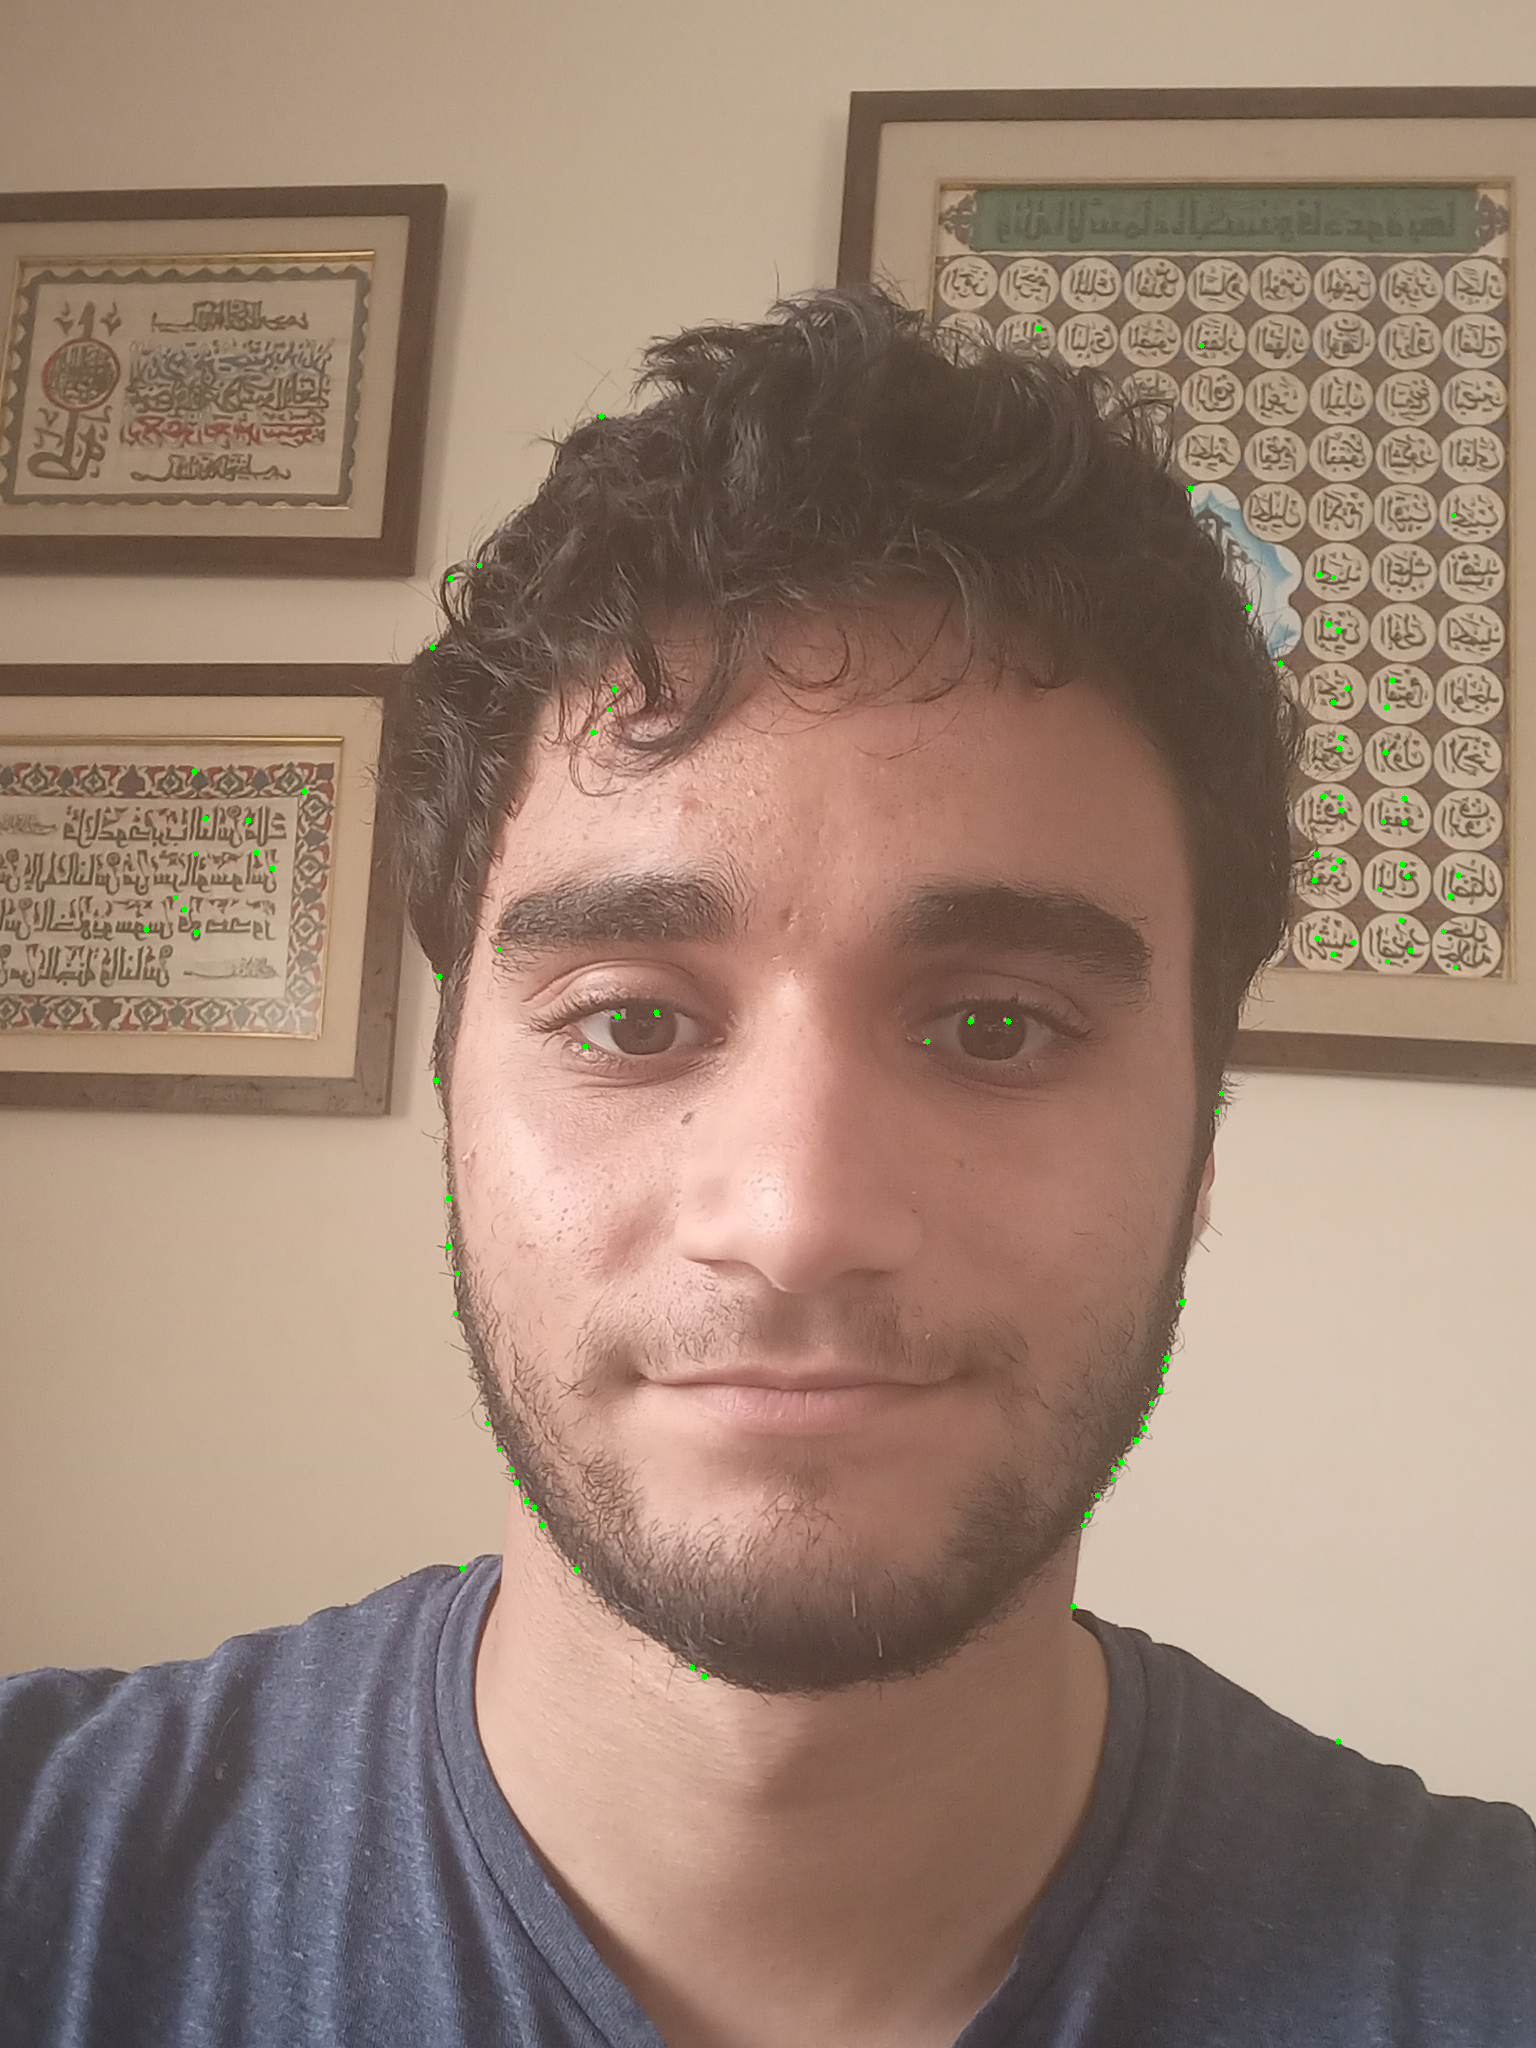

In [ ]:
# Chargement de l'image
image = cv2.imread('test3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Détection des coins avec l'algorithme de Shi-Tomasi
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

# Conversion des coordonnées des coins en entiers
corners = np.int0(corners)

# Dessin des coins sur l'image
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 3, (0, 255, 0), -1)

# Affichage de l'image avec les coins détectés
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()